# Importing time series

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure

from bokeh.layouts import row, column, layout
from bokeh.models import (Button, ColumnDataSource, Span, Range1d,
                          DatetimeTickFormatter, HoverTool, CrosshairTool)
from bokeh.models.glyphs import Circle

In [21]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook

In [4]:
output_notebook()

Loading BokehJS ...

In [5]:
DATA_DIR = os.path.abspath(os.path.join(
    os.path.abspath(''), '..', 'data'
))
fname = 'Filtered_Kust.csv'

In [6]:
df = pd.read_csv(os.path.join(DATA_DIR, fname))

In [7]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

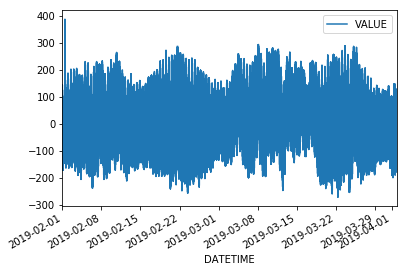

In [8]:
df.plot('DATETIME', 'VALUE')

# Filtering the various locations

In [9]:
loc_set = set(df['LOCATION'])
print(loc_set)

{'IJgeul stroommeetpaal', 'Vlissingen', 'Delfzijl', 'Hoek van Holland', 'Den Helder'}


# Matplotlib plot

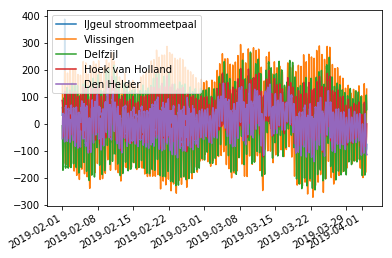

In [19]:
fig = plt.figure()
for loc in loc_set:
    m = df['LOCATION'] == loc
    plt.plot(df['DATETIME'][m], df['VALUE'][m], label=loc)

plt.legend()
fig.autofmt_xdate()

# Bokeh plot

<p>In this example we show the same data but this time shown in a bokeh plot. The bokeh plot looks very similar to the initial plot made with matplotlib:</p>
<ul>
<li>no color distinction</li>
<li>basic interactions</li>
<li>store as png</li>
</ul>

<p>Of course it is possible to give a separate color to each of the lines in Bokeh. Furthermore, Bokeh allows us to add additional tools to the plot making it more informative and interactive</p>

In [12]:
p = figure(x_axis_type='datetime')

for loc in loc_set:
    m = df['LOCATION'] == loc
    p.line(df['DATETIME'][m], df['VALUE'][m], legend=loc)
    
show(p)

<p>The first step is to add colors to each of the lines. Bokeh does not do this automatically and therefore you will need to set this yourself. In this example we chose some colors and provided the hex codes in a list called colors. You can choose your own colors as well, or use pregenerated lists from the internet.</p>
<code>from bokeh.palettes import Spectral11
numlines=len(loc_set)
mypalette=Spectral11[0:numlines]
</code>

In [13]:
colors = ['#177F75', '#21B6A8', '#7F1769', '#FFCBF4', '#B69521']

p = figure(x_axis_type="datetime")

for (loc, col) in zip(loc_set, colors):
    m = df["LOCATION"] == loc
    p.line(df["DATETIME"][m], df["VALUE"][m], legend=loc, color=col)
    
show(p)

<p>
Currently when we zoom we still zoom in both directions, while it is actually much better to only zoom in the x direction (in time). To do this we can specify which tools we want to use.
</p>
<ul>
    <li>xwheel_zoom: allowing to zoom in the x direction with the scroll wheel</li>
    <li>xpan: allowing to pan in the x direction</li>
    <li>xbox_zoom: allowing to zoom in the x direction by drawing a box</li>
</ul>

<p>Tools can be added in multiple ways in bokeh. All tools have a name, which can be stored as part of a string and read by Bokeh. Alternatively you could make a list with all the Tool objects. Thirdly it is possible to add a bit more attributes to the tools and later add the object to the figure object.</p>

<p>We can also set which tools we want to be active. In this case we want to automatically set the scroll and pan to be active.</p>

In [30]:
a = cm.ScalarMappable()

In [42]:
colors

array([[[ 35, 168, 131, 255],
        [112, 206,  86, 255],
        [170, 219,  50, 255],
        [253, 231,  36, 255]],

       [[ 68,   1,  84, 255],
        [ 42, 119, 142, 255],
        [ 53, 183, 120, 255],
        [253, 231,  36, 255]],

       [[ 50, 181, 122, 255],
        [159, 217,  56, 255],
        [ 34, 138, 141, 255],
        [253, 231,  36, 255]],

       [[ 72,  32, 113, 255],
        [ 31, 162, 134, 255],
        [ 71,  21, 103, 255],
        [253, 231,  36, 255]],

       [[243, 229,  30, 255],
        [ 30, 155, 137, 255],
        [ 30, 154, 137, 255],
        [253, 231,  36, 255]]], dtype=uint8)

In [41]:
colors = cm.Paired(np.arange(0, 5))
colors = a.to_rgba(alpha=None, x=colors, bytes=True)

In [45]:
Tools_x = "xwheel_zoom, xpan, xbox_zoom, save, reset"

colors = ['#177F75', '#21B6A8', '#7F1769', '#FFCBF4', '#B69521']

p = figure(x_axis_type="datetime", tools=Tools_x,
           active_scroll="xwheel_zoom", active_drag="xpan")

for (loc, col) in zip(loc_set, colors):
    m = df["LOCATION"] == loc
    p.line(df["DATETIME"][m], df["VALUE"][m], legend=loc, line_color=col)
    
show(p)

<p>
This plot looks much better already. We are able to distinguish the various locations by color and when we zoom in, the y-axis remains the same size, allowing us to easily zoom in to the period we are interested in. Note that we can still toggle on or off any of the tools on the side.
</p>
<p>When looking at the data it is often difficult to see what the actual value is, by reading the plot. For lines this might be easy, however, for polygons/shapes this might be more difficult. To do this we will introduce the tooltips</p>

<p>
Furthermore, it is possible to make the datetimeformat variable with the period that is being displayed. At the moment this is already using the default, which might be confusing as it will show only hours as soon as you zoom in to to a daily period.</p>

In [15]:
Tools_x = "xwheel_zoom, xpan, xbox_zoom, save, reset"

TOOLTIPS = [
    ("value", "@y"),
]

hover = HoverTool(tooltips=TOOLTIPS)

p = figure(x_axis_type="datetime", tools=Tools_x,
           active_scroll="xwheel_zoom", active_drag="xpan")

p.tools.append(hover)

for (loc, col) in zip(loc_set, colors):
    m = df["LOCATION"] == loc
    p.line(df["DATETIME"][m], df["VALUE"][m], legend=loc, color=col)
    
datetimefmt = dict(
    months=["%y-%m-%d %H:%M"],
    days=["%m-%d %H:%M"],
    hours=["%m-%d %H:%M"],
    hourmin=["%m-%d %H:%M"],
    minutes=["%m-%d %H:%M"],
    minsec=["%m-%d %H:%M"],
    seconds=["%m-%d %H:%M"]
)

p.xaxis.formatter = DatetimeTickFormatter(**datetimefmt)
show(p)

<p>In case you would be interested to add a value for each of the lines, you could add the <code>mode='vline'</code> attribute to the <code>HoverTool</code>. Instead of selecting the value at the cursor, it will now display the value for the vertical line based on the cursor position.</p>

In [16]:
Tools_x = 'xwheel_zoom, xpan, xbox_zoom, save, reset'

TOOLTIPS = [
    ('value', '@y'),
]

hover = HoverTool(tooltips=TOOLTIPS, mode='vline')
crosshair = CrosshairTool(dimensions='height')

p = figure(x_axis_type='datetime', tools=Tools_x,
           active_scroll='xwheel_zoom', active_drag='xpan')

p.tools.append(hover)
p.tools.append(crosshair)

colors = ['#177F75', '#21B6A8', '#7F1769', '#FFCBF4', '#B69521']

for (loc, col) in zip(loc_set, colors):
    m = df['LOCATION'] == loc
    p.line(df['DATETIME'][m], df['VALUE'][m], legend=loc, color=col)

datetimefmt = dict(
    months=['%y-%m-%d %H:%M'],
    days=['%m-%d %H:%M'],
    hours=['%m-%d %H:%M'],
    hourmin=['%m-%d %H:%M'],
    minutes=['%m-%d %H:%M'],
    minsec=['%m-%d %H:%M'],
    seconds=['%m-%d %H:%M']
)

p.xaxis.formatter = DatetimeTickFormatter(**datetimefmt)
show(p)

# For subplots

In [18]:
Tools_x = 'xwheel_zoom, xpan, xbox_zoom, save, reset'

TOOLTIPS = [
    ("value", "@y"),
]

hover = HoverTool(tooltips=TOOLTIPS, mode='vline')
crosshair = CrosshairTool(dimensions='height')

plt_prop = dict(x_axis_type="datetime", tools=Tools_x,
           active_scroll="xwheel_zoom", active_drag="xpan", height=400, width=800)

p1 = figure(**plt_prop)
p2 = figure(**plt_prop, x_range=p1.x_range)

p1.tools.append(hover)
p2.tools.append(hover)

p1.tools.append(crosshair)
p2.tools.append(crosshair)

colors = ["#177F75", "#21B6A8", "#7F1769", "#FFCBF4", "#B69521"]

for (loc, col) in zip(loc_set, colors):
    m = df["LOCATION"] == loc
    
    if loc in ["Vlissingen", "Hoek van Holland"]:
        p1.line(df["DATETIME"][m], df["VALUE"][m], legend=loc, color=col)
    else:    
        p2.line(df["DATETIME"][m], df["VALUE"][m], legend=loc, color=col)
    
datetimefmt = dict(
    months=["%y-%m-%d %H:%M"],
    days=["%m-%d %H:%M"],
    hours=["%m-%d %H:%M"],
    hourmin=["%m-%d %H:%M"],
    minutes=["%m-%d %H:%M"],
    minsec=["%m-%d %H:%M"],
    seconds=["%m-%d %H:%M"]
)

p1.xaxis.formatter = DatetimeTickFormatter(**datetimefmt)
p2.xaxis.formatter = DatetimeTickFormatter(**datetimefmt)
p = column(p1, p2)
output_file("Delfzijl_test.html")
show(p)